In [80]:
#import library
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sb
import os
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [81]:
train_df = pd.read_csv(r'C:\Users\Chandan\TITANIC\data\raw_data\train.csv', index_col='PassengerId')
test_df = pd.read_csv(r'C:\Users\Chandan\TITANIC\data\raw_data\test.csv' , index_col='PassengerId')

# Data Cleaning

In [82]:
pd.set_option('display.max_columns',None)

In [83]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
train_df.shape

(891, 11)

In [85]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
test_df.shape

(418, 10)

In [87]:
test_df['Survived']=-888
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-888
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-888
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-888
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-888
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-888


In [88]:
col=['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
test_df=test_df[col]

In [89]:
test_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,-888,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,-888,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,-888,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,-888,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,-888,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Survived    418 non-null int64
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [92]:
#concatinating train and test datasets
df=pd.concat((train_df , test_df), axis=0)

In [93]:
#count the null columns
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [94]:
df.shape

(1309, 11)

here we can see that more than 80 percent of data is missing from Cabin column. Therefore we'll drop that column

In [95]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


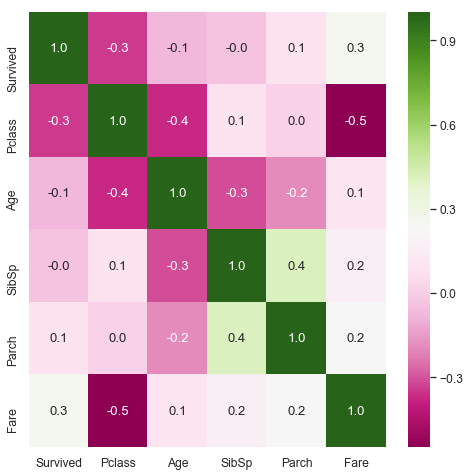

In [96]:
sb.set(font_scale=1.1)
correlation_train=train_df.corr()
plt.figure(figsize=(8,8))
sb.heatmap(correlation_train,annot=True,fmt='.1f',cmap='PiYG')

In [97]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

# Feature : Age

In [98]:
df[df['Age'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [99]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

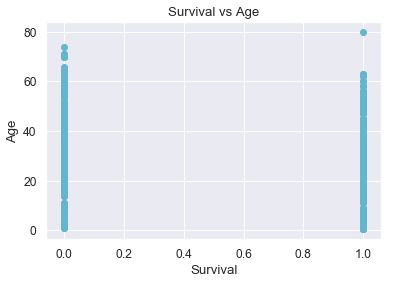

In [100]:
d=df[df.Survived!=-888]
plt.scatter(d.Survived,d.Age,color='c')

plt.title('Survival vs Age')
plt.xlabel('Survival')
plt.ylabel('Age')
plt.show()

from this graph it seems that there is no relation between survival and age

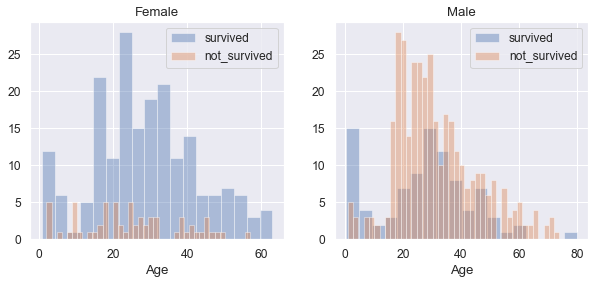

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

from this graph, we can say that most of the women were rescued...also in case of men, children and older adults were rescued.. 

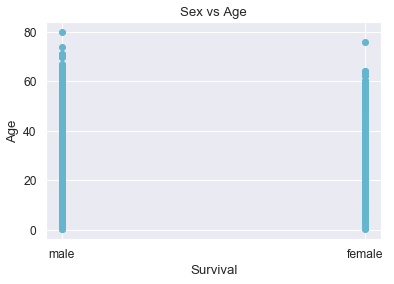

In [102]:
plt.scatter(df.Sex,df.Age,color='c')

plt.title('Sex vs Age')
plt.xlabel('Survival')
plt.ylabel('Age')
plt.show()

In [103]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [104]:
#function to extract title of the names
def get_title(name):
    Name_title=name.split(',')[1]
    title=Name_title.split('.')[0]
    title=title.strip().lower()
    return title

In [105]:
df.Name.map(lambda x : get_title(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
8       master
9          mrs
10         mrs
11        miss
12        miss
13          mr
14          mr
15        miss
16         mrs
17      master
18          mr
19         mrs
20         mrs
21          mr
22          mr
23        miss
24          mr
25        miss
26         mrs
27          mr
28          mr
29        miss
30          mr
         ...  
1280        mr
1281    master
1282        mr
1283       mrs
1284    master
1285        mr
1286        mr
1287       mrs
1288        mr
1289       mrs
1290        mr
1291        mr
1292      miss
1293        mr
1294      miss
1295        mr
1296        mr
1297        mr
1298        mr
1299        mr
1300      miss
1301      miss
1302      miss
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [106]:
df.Name.map(lambda x : get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [107]:
#function to extract title of the names
def get_title1(name):
    title_group={
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mr',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Sir',
        'dona' : 'Lady'   
    }
    Name_title=name.split(',')[1]
    title=Name_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]

In [108]:
df['Title']=df.Name.map(lambda x : get_title1(x))

In [109]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


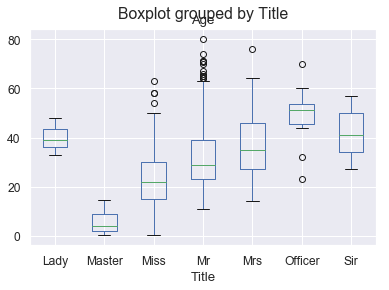

In [110]:
df[df.Age.notnull()].boxplot('Age','Title');

In [111]:
title_age_median=df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

In [112]:
df[df['Age'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


In [113]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Fare           1
Cabin       1014
Embarked       2
dtype: int64

# Feature : Embarked

In [114]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [115]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [116]:
df.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [117]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [118]:
df.pivot_table(values='Fare',index='Embarked',columns='Pclass',aggfunc=np.median)

Pclass,1,2,3
Embarked,,,
C,76.7292,15.3146,7.8958
Q,90.0000,12.3500,7.7500
S,52.0000,15.3750,8.0500


here we can see that the passengers are of 1st class and their fares are 80..therefore we can say that their embarked place might be C

In [119]:
#replacing missing values
df.Embarked.fillna('C',inplace=True)

In [120]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


# Feature : Fare

In [121]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [122]:
df.pivot_table(values='Fare',index='Embarked',columns='Pclass',aggfunc=np.median)

Pclass,1,2,3
Embarked,,,
C,78.2667,15.3146,7.8958
Q,90.0000,12.3500,7.7500
S,52.0000,15.3750,8.0500


In [123]:
#replacing the missing value with median of fare
df.Fare.fillna(8.0500,inplace=True)

In [124]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


In [125]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Cabin    1014
dtype: int64

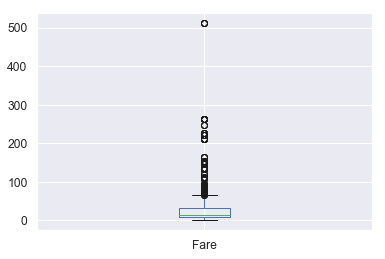

In [126]:
df.Fare.plot(kind='box')

In [127]:
df.Fare.describe()

count    1309.000000
mean       33.276193
std        51.743584
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [128]:
df[df.Fare>400]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [129]:
pd.qcut(df.Fare,4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
              ...        
1280      (-0.001, 7.896]
1281     (14.454, 31.275]
1282    (31.275, 512.329]
1283    (31.275, 512.329]
1284     (14.454, 31.275]
1285      (7.896, 14.454]
1286     (14.454, 31.275]


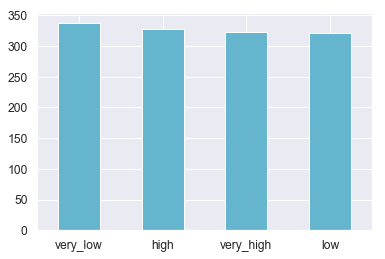

In [130]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',color='c',rot=0);

In [131]:
df['Fare_bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

# Feature : Engineering

In [132]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low


## Feature : Ticket

In [133]:
df.Ticket.value_counts()

CA. 2343         11
CA 2144           8
1601              8
S.O.C. 14879      7
PC 17608          7
347077            7
347082            7
3101295           7
347088            6
113781            6
382652            6
19950             6
16966             5
PC 17757          5
W./C. 6608        5
349909            5
113503            5
220845            5
4133              5
PC 17760          4
PC 17755          4
24160             4
LINE              4
17421             4
230136            4
12749             4
SC/Paris 2123     4
113760            4
36928             4
C.A. 34651        4
                 ..
C.A. 24579        1
347062            1
323951            1
233478            1
315088            1
248723            1
347079            1
248726            1
347074            1
347075            1
347076            1
C.A. 18723        1
250652            1
347073            1
330935            1
248659            1
330932            1
330931            1
233866            1


In [134]:
t=(df.Ticket.value_counts()>1)
t=t.to_frame()
t=t[t.Ticket==True]
t.index

Index([u'CA. 2343', u'CA 2144', u'1601', u'S.O.C. 14879', u'PC 17608',
       u'347077', u'347082', u'3101295', u'347088', u'113781',
       ...
       u'113776', u'350026', u'349256', u'2680', u'113796', u'36568',
       u'370365', u'2003', u'W.E.P. 5734', u'F.C.C. 13534'],
      dtype='object', length=216)

In [135]:
df['grp_sig']='Null'
for x in t.index:
    df.loc[df.Ticket==x,'grp_sig']='group'
df.loc[df.grp_sig=='Null','grp_sig']='single'

In [136]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,grp_sig
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low,single
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high,group
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low,single
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high,group
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low,single


In [137]:
df.grp_sig.value_counts()

single    713
group     596
Name: grp_sig, dtype: int64

In [138]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].grp_sig)

grp_sig,group,single
Survived,,
0,198,351
1,212,130


so here we can see that there this feature doesn't affect much on the survival

In [139]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,-283.301757,2.294882,29.429083,0.498854,0.385027,33.276193
std,414.337413,0.837836,13.162435,1.041658,0.865560,51.743584
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Feature : Adult or Child

In [140]:
df['Age_stage']=np.where(df.Age>=18,'Adult','Child')

In [141]:
pd.crosstab(df[df.Survived!=-888].Age_stage,df[df.Survived!=-888].Survived)

Survived,0,1
Age_stage,,
Adult,495,279
Child,54,63


## Feature : Family Size

In [142]:
df['FamilySize']=df.SibSp+df.Parch+1 #for itself

In [143]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,grp_sig,Age_stage,FamilySize
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low,single,Adult,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high,group,Adult,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low,single,Adult,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high,group,Adult,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low,single,Adult,1


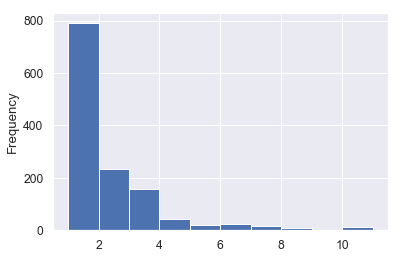

In [144]:
df['FamilySize'].plot(kind='hist')

In [145]:
df.loc[df.FamilySize==df.FamilySize.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,grp_sig,Age_stage,FamilySize
PassengerId,,,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,NaN,S,Master,very_high,group,Child,11
181,0,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,group,Adult,11
202,0,3,"Sage, Mr. Frederick",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,group,Adult,11
325,0,3,"Sage, Mr. George John Jr",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,group,Adult,11
793,0,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,group,Adult,11
847,0,3,"Sage, Mr. Douglas Bullen",male,29.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,group,Adult,11
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,group,Adult,11
1080,-888,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,group,Adult,11
1234,-888,3,"Sage, Mr. John George",male,29.0,1,9,CA. 2343,69.55,NaN,S,Mr,very_high,group,Adult,11


In [146]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


## Feature : IsMother

In [147]:
df['IsMother']=np.where(((df.Parch>0)&(df.Sex=='female')&(df.Age>18)&(df.Title!='Miss')),1,0)

In [148]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


## Feature : Deck

In [149]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [150]:
df.loc[df.Cabin == 'T' , 'Cabin'] = np.NaN

In [151]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck']=df['Cabin'].map(lambda x : get_deck(x))

In [152]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [153]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Title         1309 non-null object
Fare_bin      1309 non-null category
grp_sig       1309 non-null object
Age_stage     1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(9)
memory usage: 180.4+ KB


In [155]:
df=pd.get_dummies(df,columns=['Deck','Sex','Pclass','Title','Fare_bin','Embarked','Age_stage'])

In [156]:
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,grp_sig,FamilySize,IsMother,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_bin_very_low,Fare_bin_low,Fare_bin_high,Fare_bin_very_high,Embarked_C,Embarked_Q,Embarked_S,Age_stage_Adult,Age_stage_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,single,2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,group,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,single,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,group,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,single,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 40 columns):
Survived              1309 non-null int64
Name                  1309 non-null object
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 294 non-null object
grp_sig               1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Pcla

In [158]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','grp_sig'],axis=1,inplace=True)

In [159]:
col=[col for col in df.columns if col != 'Survived']
col=['Survived']+col
df=df[col]

In [160]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_bin_very_low,Fare_bin_low,Fare_bin_high,Fare_bin_very_high,Embarked_C,Embarked_Q,Embarked_S,Age_stage_Adult,Age_stage_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0


# Save Processed Dataset

In [161]:
processed_data_path=os.path.join(os.path.pardir,'data','processed_data')
write_train_path=os.path.join(processed_data_path,'train.csv')
write_test_path=os.path.join(processed_data_path,'test.csv')

In [162]:
#train data
df.loc[df.Survived != -888].to_csv(write_train_path)
#test data
col=[col for col in df.columns if col != 'Survived']

df.loc[df.Survived == -888,col].to_csv(write_test_path)

## import data

In [163]:
processed_data_path=os.path.join(os.path.pardir,'data','processed_data')
train_path=os.path.join(processed_data_path,'train.csv')
test_path=os.path.join(processed_data_path,'test.csv')

In [164]:
train_df=pd.read_csv(train_path,index_col='PassengerId')
test_df=pd.read_csv(test_path,index_col='PassengerId')

In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 34 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Sex_female            891 non-null int64
Sex_male              891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [166]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 33 columns):
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Sex_female            418 non-null int64
Sex_male              418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 n

## Data Preperation

In [167]:
X=train_df.loc[:,'Age' : ].as_matrix().astype('float')
y=train_df['Survived'].ravel()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [168]:
print X.shape, y.shape

(891L, 33L) (891L,)


In [169]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(712L, 33L) (712L,)
(179L, 33L) (179L,)


In [170]:
#average survival in train and test
print 'mean survival in train : {0: .3f}'.format(np.mean(y_train))
print 'mean survival in test  : {0: .3f}'.format(np.mean(y_test))

mean survival in train :  0.383
mean survival in test  :  0.385


# Baseline Model

In [171]:
from sklearn.dummy import DummyClassifier

model_dummy =DummyClassifier(strategy='most_frequent',random_state=0)

model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [172]:
print 'score for baseline model : {0: .2f}'.format(model_dummy.score(X_test,y_test))

score for baseline model :  0.61


In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [174]:
#performance matrix
print 'accuracy of baseline model {0: .2f}'.format(accuracy_score(y_test,model_dummy.predict(X_test)))

accuracy of baseline model  0.61


In [175]:
#confusion matrix
print 'accuracy of baseline model: \n {0}'.format(confusion_matrix(y_test,model_dummy.predict(X_test)))

accuracy of baseline model: 
 [[110   0]
 [ 69   0]]


In [176]:
#precision and recall score
print 'precision for baseline model : {0: .2f}'.format(precision_score(y_test,model_dummy.predict(X_test)))
print 'recall for baseline model : {0: .2f}'.format(recall_score(y_test,model_dummy.predict(X_test)))

precision for baseline model :  0.00
recall for baseline model :  0.00


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model

In [177]:
def get_sub_file(model ,filename):
    
    test_X=test_df.as_matrix().astype('float')
    predictions=model.predict(test_X)
    df_submission=pd.DataFrame({'PassengerId':test_df.index,'Survived':predictions})
    
    sub_data_path=os.path.join(os.path.pardir,'submissions','sub2')
    sub_file_path=os.path.join(sub_data_path,filename)
    
    df_submission.to_csv(sub_file_path,index=False)

In [178]:
get_sub_file(model_dummy,'01_dummy.csv')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Logistic Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
model_lr_1=LogisticRegression(random_state=0)

In [181]:
model_lr_1.fit(X_train,y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
print 'score for logistic regression -version 1: {0: .2f}'.format(model_lr_1.score(X_test,y_test))

score for logistic regression -version 1:  0.84


In [183]:
#performance matrix
print 'accuracy of baseline model {0: .2f}'.format(accuracy_score(y_test,model_lr_1.predict(X_test)))
#confusion matrix
print 'accuracy of baseline model: \n {0}'.format(confusion_matrix(y_test,model_lr_1.predict(X_test)))
#precision and recall score
print 'precision for baseline model : {0: .2f}'.format(precision_score(y_test,model_lr_1.predict(X_test)))
print 'recall for baseline model : {0: .2f}'.format(recall_score(y_test,model_lr_1.predict(X_test)))

accuracy of baseline model  0.84
accuracy of baseline model: 
 [[96 14]
 [15 54]]
precision for baseline model :  0.79
recall for baseline model :  0.78


In [184]:
model_lr_1.coef_

array([[-0.02952258,  0.00438048, -0.50469496,  0.58917923,  0.0970429 ,
        -0.17922144, -0.42844323,  0.48146112,  1.06575213,  0.37718554,
        -0.21276122, -0.35328693,  1.16858944, -0.32086057,  0.88475009,
         0.40131337, -0.43833459,  0.19766601,  1.39544768,  0.12967304,
        -1.21739537,  0.68294921,  0.0286745 , -0.3692862 ,  0.09522228,
         0.1824919 ,  0.21138335,  0.35863133,  0.4071902 ,  0.38394311,
         0.05659555,  0.23779525,  0.60993361]])

In [185]:
get_sub_file(model_lr_1,'model_lr_1.csv')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Hyperparameter Optimization

In [186]:
model_lr=LogisticRegression(random_state=0)

from sklearn.model_selection import GridSearchCV

In [187]:
parameters={'C':[1.0,10.0 ,50.0,100.0,1000.0],'penalty':['l1','l2']}
clf=GridSearchCV(model_lr,param_grid=parameters,cv=3)

In [188]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1.0, 10.0, 50.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [189]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [190]:
print 'score for logistic regression -version 2: {0: .2f}'.format(clf.score(X_test,y_test))

score for logistic regression -version 2:  0.84


In [191]:
get_sub_file(clf,'lr_hyp_1.csv')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [192]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [193]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()

### Stochastic Gradient Descent (SGD):

In [194]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Random Forest:

In [195]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Logistic Regression:

In [196]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### K Nearest Neighbor:

In [197]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes:

In [198]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### Perceptron:

In [199]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Linear Support Vector Machine:

In [200]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Decision Tree:

In [201]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [202]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.32,Decision Tree
98.20,Random Forest
84.96,KNN
83.84,Logistic Regression
78.11,Naive Bayes
73.63,Support Vector Machines
71.27,Stochastic Gradient Decent
65.88,Perceptron


In [206]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=1000,max_features=0.4)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

('Scores:', array([0.76666667, 0.82222222, 0.7752809 , 0.83146067, 0.86516854,
       0.82022472, 0.82022472, 0.76404494, 0.85393258, 0.86363636]))
('Mean:', 0.8182862331176939)
('Standard Deviation:', 0.03630148284176045)


In [208]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

(98.32, '%')


In [209]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

('oob score:', 81.26, '%')


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

## Test new parameters

In [215]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

('oob score:', 83.61, '%')


In [216]:
get_sub_file(random_forest,'random_fhyp.csv')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
get_sub_file(decision_tree,'des_tree.csv')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
